In [141]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from astropy.io import fits
from astropy.table import Table

from astropy import units as u
from astropy import constants as const
from astroquery.simbad import Simbad

from astropy.coordinates import SkyCoord, match_coordinates_sky

import sys
sys.path.append('/Users/james/Dropbox/python/qthist2d/')
from qthist2d import qthist, qtcount, binned_statistic_qt


In [142]:
import matplotlib
matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [3]:
# https://arxiv.org/abs/2012.02061
GCNS_file = '../lonely_stars/GCNS_cat.fits'
GCNS = Table.read(GCNS_file, format='fits')

GCNS_c = SkyCoord(GCNS['RA'].value*u.degree, GCNS['DEC'].value*u.degree)

# past me already did this, yay! 
# https://github.com/jradavenport/lonely_stars/blob/main/GCNS_KDTree.ipynb
# c1 = SkyCoord(ra = GCNS['RA'] * u.degree,
#               dec = GCNS['DEC'] * u.degree,
#               distance= GCNS['DIST_50'] * u.kpc,
#               frame='icrs')


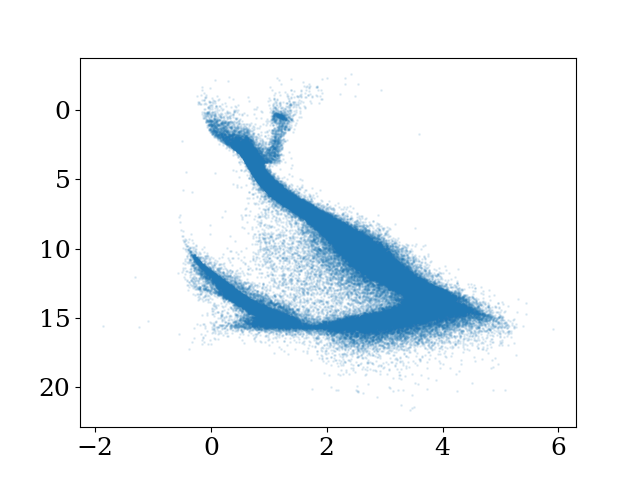

In [4]:
GCNSdf = GCNS.to_pandas()
plt.figure()
_ = plt.scatter(GCNSdf['PHOT_BP_MEAN_MAG'].values - GCNSdf['PHOT_RP_MEAN_MAG'].values, 
               GCNSdf['PHOT_G_MEAN_MAG'].values - 5*np.log10(GCNSdf['DIST_50'].values*1000) + 5, s=1,alpha=0.1)


plt.gca().invert_yaxis()

In [5]:
# Gaia ESO
# https://doi.eso.org/10.18727/archive/25
GaiaESO = Table.read('GaiaESO.fits', format='fits')
# GaiaESO.columns
len(GaiaESO)

114916

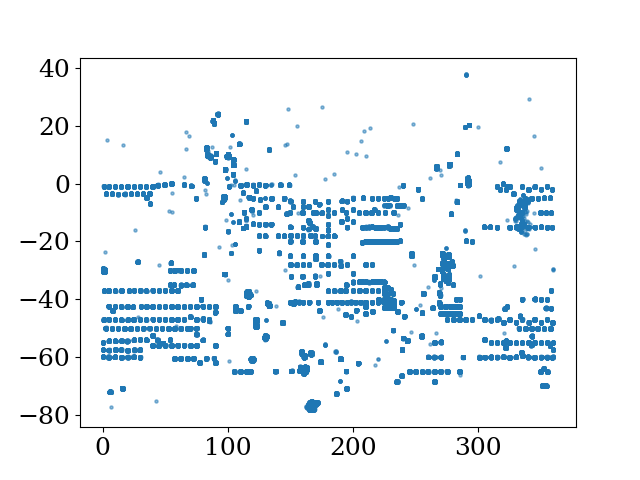

In [6]:
plt.figure()
plt.scatter(GaiaESO['RA'], GaiaESO['DECLINATION'], s=5, alpha=0.5)

In [7]:
# GESO = GaiaESO.to_pandas().drop_duplicates(subset='OBJECT')
# GaiaESO

In [8]:
# HARPS
# https://doi.eso.org/10.18727/archive/33
HARPS = Table.read('HARPS.fits', format='fits')
print(len(HARPS))

Hdf = HARPS.to_pandas()
print(Hdf.shape)

289843
(289843, 52)


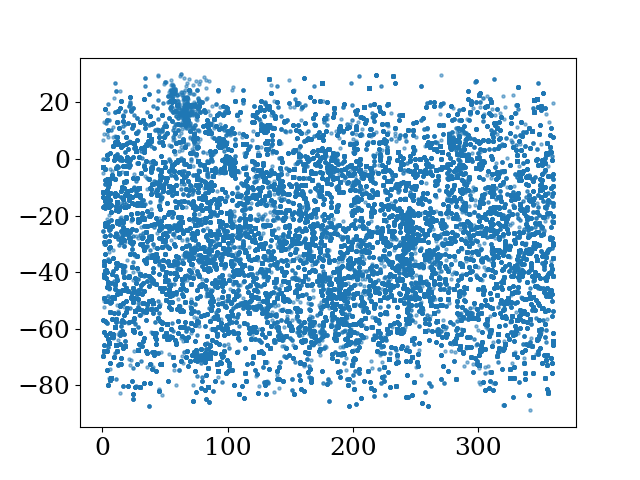

In [9]:
plt.figure()
plt.scatter(HARPS['ra_simbad'], HARPS['dec_simbad'], s=5, alpha=0.5)

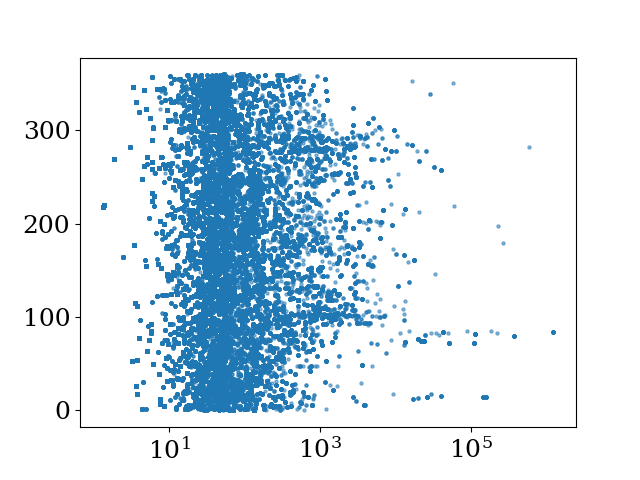

In [10]:
plt.figure()
plt.scatter(1000./HARPS['plx_simbad'], HARPS['ra_simbad'], s=5, alpha=0.5)
plt.xscale('log')

(8125, 52)


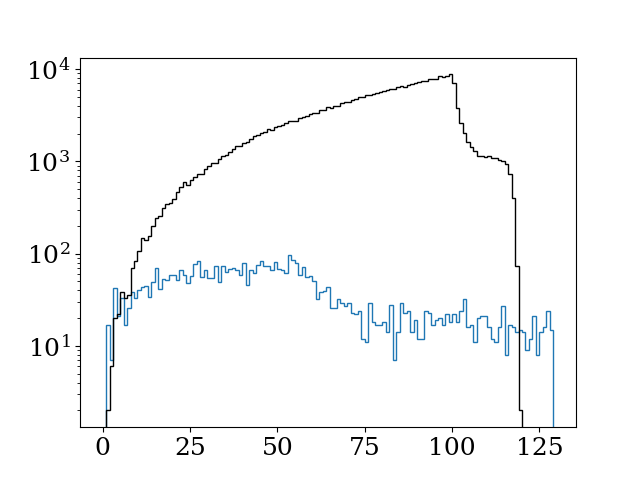

In [11]:
Hdf = Hdf.drop_duplicates(subset='tel_object')
print(Hdf.shape)
plt.figure()
_=plt.hist(1000./Hdf['plx_simbad'],histtype='step', bins=np.arange(0,130,1), label='HARPS')
_=plt.hist(GCNS['DIST_50']*1000, histtype='step', bins=np.arange(0,130,1), color='k', label='GCNS')
plt.yscale('log')

In [12]:
sum(1000./Hdf['plx_simbad'] < 120)

4651

In [13]:
# https://neid.ipac.caltech.edu/search.php
neid = pd.read_csv('neid_level2.csv')
print(neid.shape)

# neid = neid.drop_duplicates(subset='object')
# print(neid.shape)

(12851, 21)


In [14]:
neid

,filename,object,qobject,qra,qdec,obsdate,exptime,obsmode,obstype,program,...,sunagl,airmass,seeing,moonagl,ccfjdsum,ccfrvmod,dvrms,swversion,extsnr,flagged
0,neidL2_20250424T111555.fits,TIC 325554331,Gaia DR2 4472832130942575872,17:57:47.6674,+04:44:16.731,2025-04-24 11:15:55,679.774663,hr,Sci,2025A-2014,...,-18.6872,1.1241,0.0,59.6281,2.460790e+06,-110.2421,0.0016,v1.4.2,76.3139,0
1,neidL2_20250424T104033.fits,HD 185144,Gaia DR2 2261614264930275072,19:32:23.3663,+69:39:13.293,2025-04-24 10:40:33,450.079819,hr,Sci,2025A-2014,...,-25.0160,1.3383,0.0,99.0580,2.460790e+06,26.7350,0.0002,v1.4.2,371.4173,0
2,neidL2_20250424T103134.fits,HD 185144,Gaia DR2 2261614264930275072,19:32:23.3663,+69:39:13.293,2025-04-24 10:31:34,499.911066,hr,Sci,2025A-2014,...,-26.5467,1.3497,0.0,99.0580,2.460790e+06,26.7351,0.0003,v1.4.2,345.7272,0
3,neidL2_20250424T102236.fits,HD 185144,Gaia DR2 2261614264930275072,19:32:23.3663,+69:39:13.293,2025-04-24 10:22:36,499.970979,hr,Sci,2025A-2014,...,-28.0399,1.3619,0.0,99.0585,2.460790e+06,26.7346,0.0003,v1.4.2,362.6240,0
4,neidL2_20250423T054635.fits,HD 127334,Gaia DR2 1491593733326694912,14:29:37.0324,+41:47:41.870,2025-04-23 05:46:35,694.790729,hr,Sci,2025A-2014,...,-39.6119,1.1173,0.0,54.6879,2.460789e+06,-0.4293,0.0003,v1.4.2,327.4382,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12846,neidL2_20201208T124625.fits,HD 89269,Gaia DR2 806000816970521728,10:18:52.0,+44:02:49,2020-12-08 12:30:54,901.968201,hr,Eng,2020B-2001,...,-21.4868,1.0223,0.0,66.3985,2.459192e+06,-10.4012,0.0000,v0.5.2,NaN,1
12847,neidL2_20201208T123045.fits,HD 89269,Gaia DR2 806000816970521728,10:18:52.0,+44:02:49,2020-12-08 12:15:13,902.636536,hr,Eng,2020B-2001,...,-24.7213,1.0247,0.0,66.4061,2.459192e+06,-10.3994,0.0000,v0.5.2,NaN,1
12848,neidL2_20201208T121418.fits,HD 89269,Gaia DR2 806000816970521728,10:18:52.0,+44:02:49,2020-12-08 12:13:44,4.723731,hr,Eng,2020B-2001,...,-25.0303,1.0252,0.0,66.4069,2.459192e+06,-10.3865,0.0000,v0.5.2,NaN,1
12849,neidL2_20201208T121336.fits,HD 89269,Gaia DR2 806000816970521728,10:18:52.0,+44:02:49,2020-12-08 12:06:49,377.139856,hr,Eng,2020B-2001,...,-26.4649,1.0272,0.0,66.4106,2.459192e+06,-10.4017,0.0000,v0.5.2,NaN,1


In [16]:
kpf = pd.read_csv('kpf.csv')
print(kpf.shape)

# kpf = kpf.drop_duplicates(subset=('targname','object'))
# print(kpf.shape)

(304107, 24)


In [17]:
kpf['koaimtyp'].unique()

array(['undefined', 'object', 'arclamp', 'bias', 'dark', 'flatlamp',
       'solar'], dtype=object)

In [18]:
kpf = kpf[(kpf['koaimtyp'] == 'object')]
print(kpf.shape)
kpf['obj2'] = kpf['object'].astype(str).values + kpf['targname'].astype(str).values
print(kpf.shape)

(10094, 24)
(10094, 25)


In [19]:
kpf['obj2'].unique().size

1837

In [20]:
HIRES = pd.read_csv('hires.csv')
print(HIRES.shape)
HIRES = HIRES[HIRES['koaimtyp'] == 'object']
print(HIRES.shape)

(477635, 26)
(190714, 26)


In [21]:
HIRES['obj2'] = HIRES['targname'].astype(str).values + HIRES['object'].astype(str).values

In [22]:
HIRES['obj2'].unique().size

50352

In [23]:
HIRES['object'].unique().size

13179

In [24]:
print(HIRES['ra'].values.size)
sum(np.isfinite(HIRES['ra'].values))

190714


190711

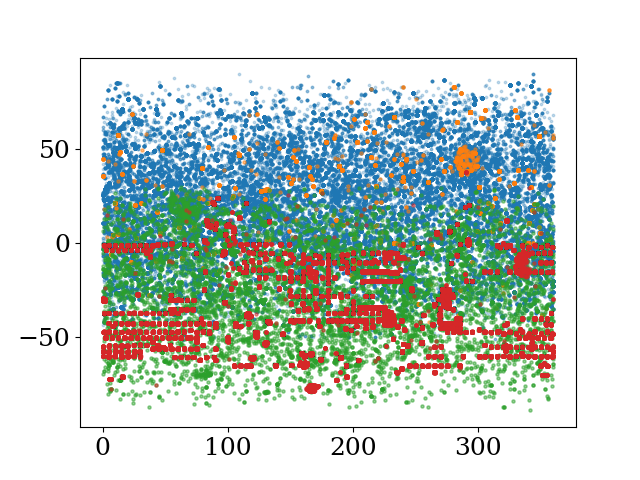

In [25]:
plt.figure()
plt.scatter(HIRES['ra'], HIRES['dec'], s=3, alpha=0.25, label='HIRES')
plt.scatter(kpf['ra'], kpf['dec'], alpha=.5, s=5, label='KPF (N=1837)')
plt.scatter(Hdf['ra_simbad'], Hdf['dec_simbad'], s=5, alpha=0.5, label='HARPS (N=8125)')
plt.scatter(GaiaESO['RA'], GaiaESO['DECLINATION'], s=5, alpha=0.5, label='GaiaESO')

(128801, 55)


/var/folders/8t/yh7p62792_b_y17g3f6wk0wm0000gn/T/ipykernel_21524/1007179225.py:1: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  esp = pd.read_csv('ESPaDOnS.csv')


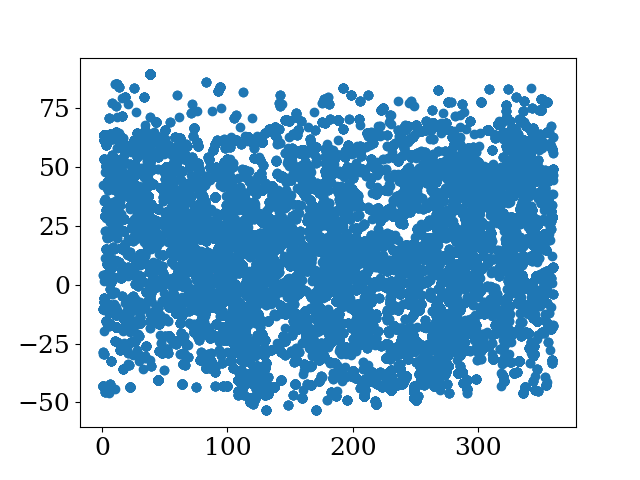

In [26]:
esp = pd.read_csv('ESPaDOnS.csv')
print(esp.shape)
plt.figure()
plt.scatter(esp['"RA (J2000.0)"'], esp['"Dec. (J2000.0)"'])

In [27]:
print(esp['"Target Name"'].unique().size)

6702


In [28]:
Eok = np.isfinite(esp['"RA (J2000.0)"'].values) & np.isfinite(esp['"Dec. (J2000.0)"'].values)
esp_c = SkyCoord(esp['"RA (J2000.0)"'].values[Eok]*u.degree, esp['"Dec. (J2000.0)"'].values[Eok]*u.degree)
edx = GCNS_c.match_to_catalog_sky(esp_c)
emtch = edx[0][edx[1].to('arcsec').value < 5]
print(sum(edx[1].to('arcsec').value < 5))

1482


In [29]:
Hiok = np.isfinite(HIRES['ra'].values) & np.isfinite(HIRES['dec'].values)
HIRES_c = SkyCoord(HIRES['ra'].values[Hiok]*u.degree, HIRES['dec'].values[Hiok]*u.degree)
Hidx = GCNS_c.match_to_catalog_sky(HIRES_c)
Himtch = Hidx[0][Hidx[1].to('arcsec').value < 5]
print(sum(Hidx[1].to('arcsec').value < 5))

4189


In [30]:
HAok = np.isfinite(Hdf['ra_simbad'].values) & np.isfinite(Hdf['dec_simbad'].values)
HARPS_c = SkyCoord(Hdf['ra_simbad'].values[HAok]*u.degree, Hdf['dec_simbad'].values[HAok]*u.degree)

HAdx = GCNS_c.match_to_catalog_sky(HARPS_c)
HAmtch = HAdx[0][HAdx[1].to('arcsec').value < 5]
print(sum(HAdx[1].to('arcsec').value < 5))

2812


In [31]:
GaiaESO_C = SkyCoord(GaiaESO['RA'].value*u.degree, GaiaESO['DECLINATION'].value*u.degree)
Gdx = GCNS_c.match_to_catalog_sky(GaiaESO_C)
Gmtch = Gdx[0][Gdx[1].to('arcsec').value < 5]
print(sum(Gdx[1].to('arcsec').value < 5))

147


In [32]:
kpf_c = SkyCoord(kpf['ra'].values*u.degree, kpf['dec'].values*u.degree)
kdx = GCNS_c.match_to_catalog_sky(kpf_c)
kmtch = kdx[0][kdx[1].to('arcsec').value < 5]
print(sum(kdx[1].to('arcsec').value < 5))

118


In [274]:
print(len(neid_c))

12847


In [33]:
neid_c = SkyCoord(neid['qra'].values, neid['qdec'].values, unit=(u.hourangle, u.deg))
nok = (np.isfinite(neid_c.ra.value)) & (np.isfinite(neid_c.dec.value))
neid_c = neid_c[nok]
ndx = GCNS_c.match_to_catalog_sky(neid_c)
nmtch = ndx[0][ndx[1].to('arcsec').value < 5]
print(sum(ndx[1].to('arcsec').value < 5))

267


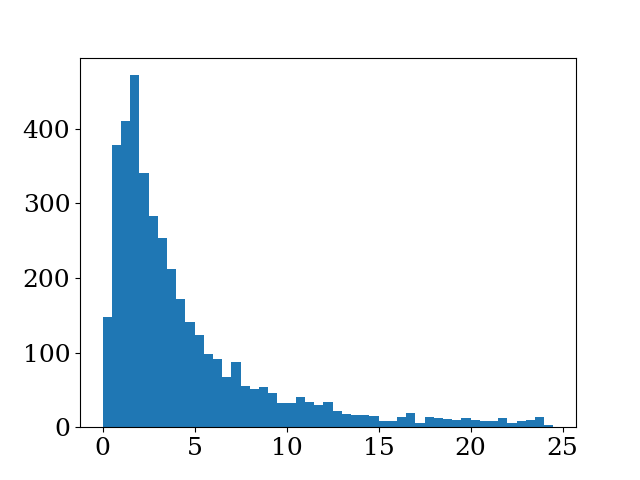

In [34]:
plt.figure()
# _ = plt.hist(Hidx[1].to('arcsec').value,bins=np.arange(0,25,.5))
_ = plt.hist(HAdx[1].to('arcsec').value,bins=np.arange(0,25,.5))

In [35]:
sum(Hidx[1].to('arcsec').value < 2)

2509

In [81]:
# OWLS
ofile = 'owlsTab1_Updated_arxiv.csv'
owls = pd.read_csv(ofile)

owls_ra = np.array([])
owls_dec = np.array([])

for k in range(len(owls)):
    # result_table = Simbad.query_object("m1")
    otmp = Simbad.query_object(owls['Name'][k])
    owls_ra = np.append(owls_ra, otmp['RA'].value[0])
    owls_dec = np.append(owls_dec, otmp['DEC'].value[0])

In [89]:

owls_c = SkyCoord(owls_ra, owls_dec, unit=(u.hourangle, u.deg))
odx = GCNS_c.match_to_catalog_sky(owls_c)
omtch = odx[0][odx[1].to('arcsec').value < 5]
print(sum(odx[1].to('arcsec').value < 5))


110


In [113]:
# APF catalog from Howard
# had to do a bunch of manual cleaning... didn't get it all sorted, but should help!
apf = pd.read_table('APF_temp.txt', delimiter='|', names=['Name',])

apf_ra = np.array([])
apf_dec = np.array([])

for k in range(len(apf)):
    atmp = Simbad.query_object(apf['Name'][k])
    if atmp is not None:
        apf_ra = np.append(apf_ra, atmp['RA'].value[0])
        apf_dec = np.append(apf_dec, atmp['DEC'].value[0])

/Users/james/anaconda3/lib/python3.11/site-packages/astroquery/simbad/core.py:135: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): 'HD 115809773476836' this identifier has an incorrect format for catalog: 	HD : Henry Draper
  warnings.warn("Warning: The script line number %i raised "
/Users/james/anaconda3/lib/python3.11/site-packages/astroquery/simbad/core.py:135: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): 'HD 116663451484521' this identifier has an incorrect format for catalog: 	HD : Henry Draper
  warnings.warn("Warning: The script line number %i raised "
/Users/james/anaconda3/lib/python3.11/site-packages/astroquery/simbad/core.py:135: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): 'HD 1288393710955172864' this identifier has an incorrect format for catalog: 	H

In [115]:
len(apf_ra)

2803

In [117]:
apf_c = SkyCoord(apf_ra, apf_dec, unit=(u.hourangle, u.deg))
adx = GCNS_c.match_to_catalog_sky(apf_c)
amtch = adx[0][adx[1].to('arcsec').value < 5]
print(sum(adx[1].to('arcsec').value < 5))


1161


In [242]:
# melchiors 
# https://www.aanda.org/articles/aa/full_html/2024/01/aa46847-23/aa46847-23.html
mel = pd.read_table('J_A+A_681_A107_metagaia.dat.gz.txt', delimiter='|')
# mel.columns.values
len(mel)

1593

(0.0, 1000.0)

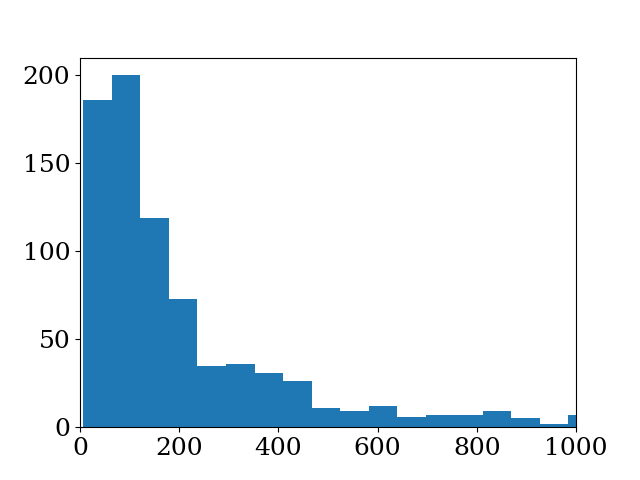

In [241]:
plt.figure()
_ = plt.hist(mel['Dist'],bins=100)
plt.xlim(0,1000)

In [244]:
mel_c = SkyCoord(mel['RAdeg'], mel['DEdeg'], unit=(u.deg, u.deg))
mdx = GCNS_c.match_to_catalog_sky(mel_c)
mmtch = mdx[0][mdx[1].to('arcsec').value < 5]
print(sum(mdx[1].to('arcsec').value < 5))


569


In [282]:
# ESPRESSO. Did a big dump of all objects here
# http://archive.eso.org/wdb/wdb/eso/espresso/form
# had to set query limit to 100000 rows...
exp = pd.read_csv('wdb_query_9350_eso.csv')
print(len(exp))

52517


In [287]:
expok = np.isfinite(exp['RA']) & np.isfinite(exp['DEC'])
print(np.sum(expok))

exp_c = SkyCoord(exp['RA'][expok], exp['DEC'][expok], unit=(u.deg, u.deg))
exdx = GCNS_c.match_to_catalog_sky(exp_c)
exmtch = exdx[0][exdx[1].to('arcsec').value < 5]
print(sum(exdx[1].to('arcsec').value < 5))


51738
517


In [ ]:
# need to add from Emma:
# GALAH
# CARMENES
# HST

In [290]:
# CARMENES
# had to do Sesame to resolve name, -> XML -> ChatGPT to turn into this table
car = pd.read_csv('emma_data/CARMENES/Cleaned_CDS_Sesame_Output.csv')
car.columns

Index(['INFO', 'MType', 'Vel', 'errDEmas', 'errRAmas', 'jdedeg', 'jpos',
       'jradeg', 'nrefs', 'oid', 'oname', 'otype', 'plx', 'pm', 'refPos',
       'spNum', 'spType'],
      dtype='object')

In [294]:
carok = np.isfinite(car['jradeg']) & np.isfinite(car['jdedeg'])
print(np.sum(carok))
car_c = SkyCoord(car['jradeg'][carok], car['jdedeg'][carok], unit=(u.deg, u.deg))
cardx = GCNS_c.match_to_catalog_sky(car_c)
carmtch = cardx[0][cardx[1].to('arcsec').value < 5]
print(sum(cardx[1].to('arcsec').value < 5))


354
95


In [278]:
# GALAH
gal=Table.read('emma_data/GALAH/galah_dr4_vac_wise_tmass_gaiadr3_240705.fits', format='fits')
# gal

In [279]:
# gal['source_id']
galok = np.isfinite(gal['ra']) & np.isfinite(gal['dec'])
gal_c = SkyCoord(gal['ra'].value[galok], gal['dec'].value[galok], unit=(u.deg, u.deg))
gadx = GCNS_c.match_to_catalog_sky(gal_c)
gamtch = gadx[0][gadx[1].to('arcsec').value < 5]
print(sum(gadx[1].to('arcsec').value < 5))


7234


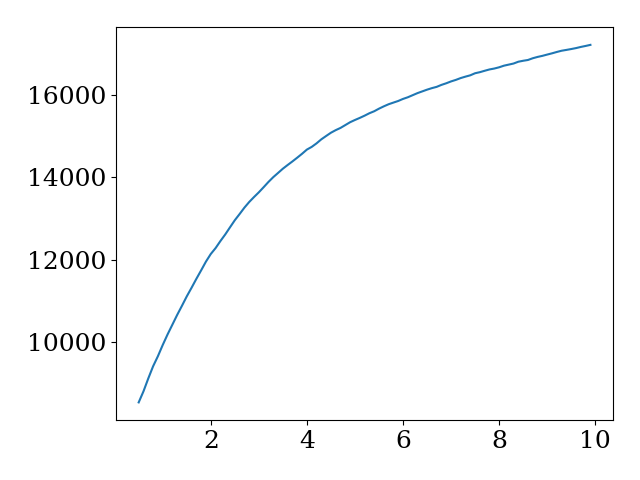

In [264]:
SpecCount = np.array([])
for k in np.arange(0.5, 10, 0.1):
    sep = k

    HasSpec = ((Gdx[1].to('arcsec').value < sep) + 
               (Hidx[1].to('arcsec').value < sep) + 
               (HAdx[1].to('arcsec').value < sep) + 
               (kdx[1].to('arcsec').value < sep) +
               (edx[1].to('arcsec').value < sep) +
               (ndx[1].to('arcsec').value < sep) + 
               (odx[1].to('arcsec').value < sep) + 
               (adx[1].to('arcsec').value < sep) + 
               (mdx[1].to('arcsec').value < sep) + 
               (gadx[1].to('arcsec').value < sep))
    
    # print(sum(HasSpec))
    SpecCount = np.append(SpecCount, sum(HasSpec))
plt.figure()
plt.plot(np.arange(0.5, 10, 0.1), SpecCount)
plt.tight_layout()

In [308]:
sep = 5
# WHICH stars Haz Spectra?
HasSpec = ((Gdx[1].to('arcsec').value < sep) + # GaiaESO
           (Hidx[1].to('arcsec').value < sep) + #HIRES
           (HAdx[1].to('arcsec').value < sep) + #HARPS
           (kdx[1].to('arcsec').value < sep) + #KPF
           (edx[1].to('arcsec').value < sep) + #Espadons
           (ndx[1].to('arcsec').value < sep) + #NEID
           (odx[1].to('arcsec').value < sep) + #OWLS
           (adx[1].to('arcsec').value < sep) + #APF
           (mdx[1].to('arcsec').value < sep) + # melchiors
           (gadx[1].to('arcsec').value < sep) + #GALAH
           (exdx[1].to('arcsec').value < sep) + #ESPRESSO
           (cardx[1].to('arcsec').value < sep) # CARMENES
          )
print(sum(HasSpec))

15641


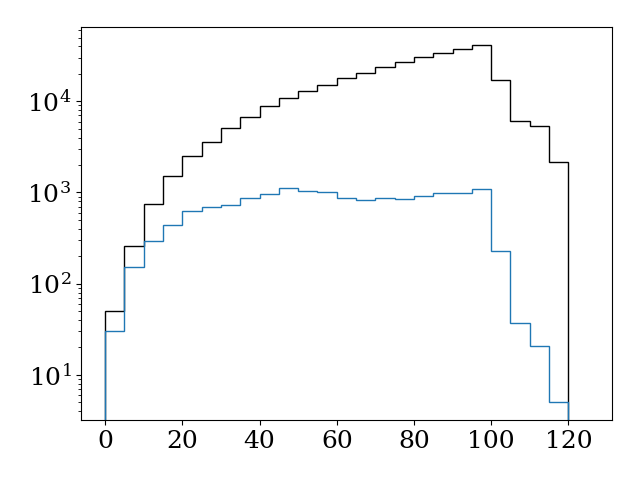

In [309]:
plt.figure()
N2,B2,_ = plt.hist(GCNS['DIST_50']*1000, histtype='step', bins=np.arange(0,130,5), color='k', label='GCNS')
N1,B1,_ = plt.hist(GCNS['DIST_50'][HasSpec]*1000, histtype='step', bins=np.arange(0,130,5))
plt.yscale('log')
plt.tight_layout()

/var/folders/8t/yh7p62792_b_y17g3f6wk0wm0000gn/T/ipykernel_21524/2744074590.py:3: RuntimeWarning: invalid value encountered in divide
  plt.step(B2[1:], N1/N2)


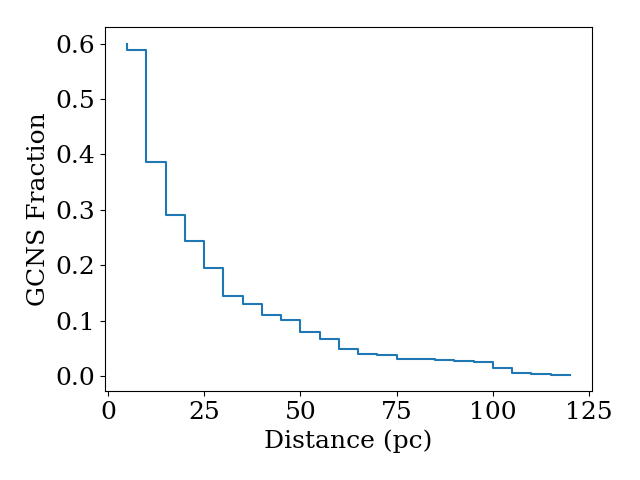

In [310]:
plt.figure()
plt.plot()
plt.step(B2[1:], N1/N2)
plt.xlabel('Distance (pc)')
plt.ylabel('GCNS Fraction')
# plt.title('HARPS, KPF, HIRES, GaiaESO, NEID, ESPaDOnS',fontsize=12)
plt.tight_layout()
plt.savefig('frac_v1.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

Text(0.5, 0, 'G mag')

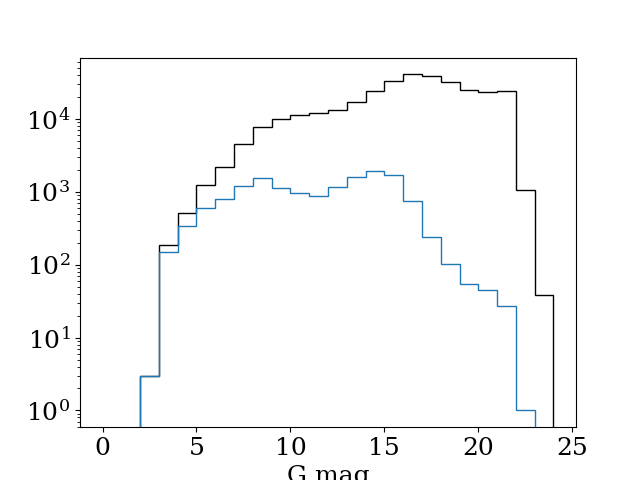

In [311]:
plt.figure()
N2,B2,_ = plt.hist(GCNS['PHOT_BP_MEAN_MAG'], histtype='step', bins=np.arange(0,25,1), color='k', label='GCNS')
N1,B1,_ = plt.hist(GCNS['PHOT_BP_MEAN_MAG'][HasSpec], histtype='step', bins=np.arange(0,25,1))
plt.yscale('log')
plt.xlabel('G mag')

/var/folders/8t/yh7p62792_b_y17g3f6wk0wm0000gn/T/ipykernel_21524/3126387408.py:3: RuntimeWarning: invalid value encountered in divide
  plt.step(B2[1:], N1/N2)


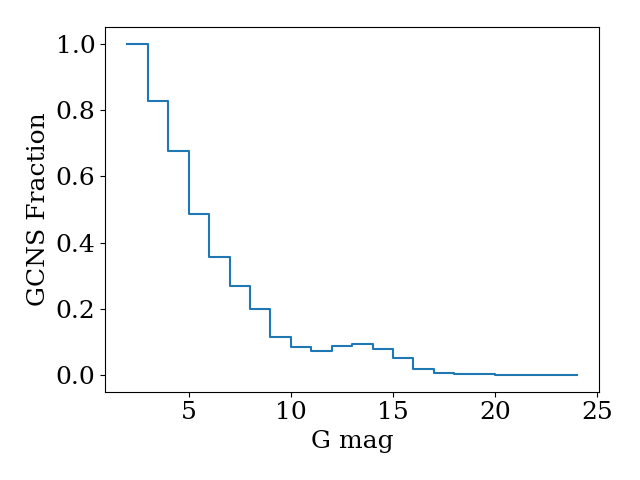

In [312]:
plt.figure()
plt.plot()
plt.step(B2[1:], N1/N2)
plt.xlabel('G mag')
plt.ylabel('GCNS Fraction')
# plt.title('HARPS, KPF, HIRES, GaiaESO, NEID, ESPaDOnS',fontsize=12)
plt.tight_layout()
plt.savefig('frac_v2.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

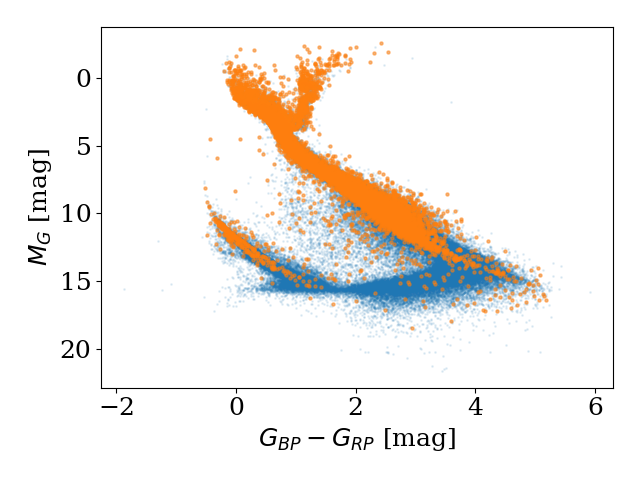

In [313]:
# GCNSdf = GCNS.to_pandas()
plt.figure()
_ = plt.scatter(GCNSdf['PHOT_BP_MEAN_MAG'].values - GCNSdf['PHOT_RP_MEAN_MAG'].values, 
               GCNSdf['PHOT_G_MEAN_MAG'].values - 5*np.log10(GCNSdf['DIST_50'].values*1000) + 5, s=1,alpha=0.1)

_ = plt.scatter(GCNSdf['PHOT_BP_MEAN_MAG'].values[HasSpec] - GCNSdf['PHOT_RP_MEAN_MAG'].values[HasSpec], 
               GCNSdf['PHOT_G_MEAN_MAG'].values[HasSpec] - 5*np.log10(GCNSdf['DIST_50'].values[HasSpec]*1000) + 5, s=5, alpha=0.5)



plt.gca().invert_yaxis()

plt.xlabel('$G_{BP} - G_{RP}$ [mag]')
plt.ylabel('$M_G$ [mag]')
plt.tight_layout()

In [314]:
x1,y1 = GCNSdf['PHOT_BP_MEAN_MAG'].values - GCNSdf['PHOT_RP_MEAN_MAG'].values, GCNSdf['PHOT_G_MEAN_MAG'].values - 5*np.log10(GCNSdf['DIST_50'].values*1000) + 5
x2,y2 = GCNSdf['PHOT_BP_MEAN_MAG'].values[HasSpec] - GCNSdf['PHOT_RP_MEAN_MAG'].values[HasSpec], GCNSdf['PHOT_G_MEAN_MAG'].values[HasSpec] - 5*np.log10(GCNSdf['DIST_50'].values[HasSpec]*1000) + 5


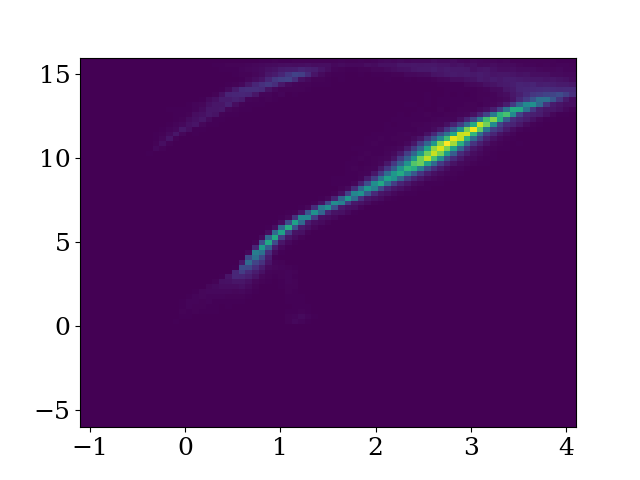

In [315]:
plt.figure()
zz2, xx2, yy2, img = plt.hist2d(x1,y1, bins=75, range=[[-1.1,4.1],[-6,16]])

/var/folders/8t/yh7p62792_b_y17g3f6wk0wm0000gn/T/ipykernel_21524/4289189149.py:4: RuntimeWarning: invalid value encountered in divide
  FRAC =  num1/num0


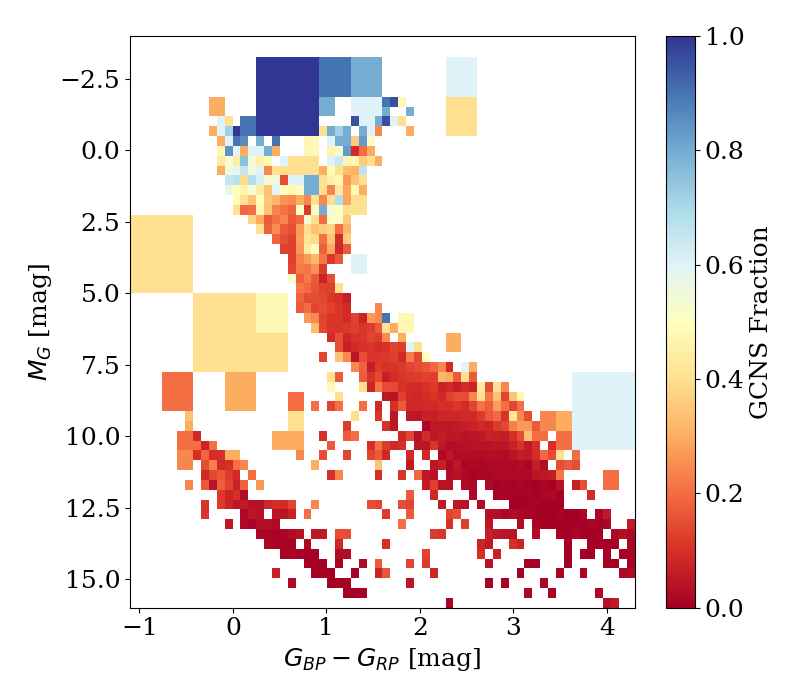

In [316]:

num0, xmin, xmax, ymin, ymax = qthist(x1,y1, N=6, thresh=5, density=False, rng=[[-1.1,4.3],[-6,16]])
num1 = qtcount(x2, y2, xmin, xmax, ymin, ymax, density=False)

FRAC =  num1/num0
SCORE = num1/(num0+1)


CMAP = plt.cm.RdYlBu

fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111)
clr = (SCORE - np.nanmin(SCORE)) / (np.nanmax(SCORE) - np.nanmin(SCORE))
for k in range(len(SCORE)):
    if (num1[k] > 0) & (num0[k] > 1) :
        ax.add_patch(plt.Rectangle((xmin[k], ymin[k]), xmax[k]-xmin[k], ymax[k]-ymin[k], 
                                   color=CMAP(clr[k]), ec=None, lw=0.2,))

plt.xlim(-1.1,4.3)
plt.ylim(16,-4)

# plt.contour((xx2[1:]+xx2[:-1])/2., (yy2[1:]+yy2[:-1])/2., 
#             zz2.T, colors='C0', alpha=0.5, 
#             levels=(2,10,100,500))

# create a fake image to show, just to invoke colormap
img = plt.imshow(np.array([[np.nanmin(FRAC), np.nanmax(FRAC)]]), cmap=CMAP, aspect='auto', 
                 vmin=np.nanmin(FRAC),vmax=np.nanmax(FRAC)) # scale to the "SCORE"
img.set_visible(False) # throw this away
cb = plt.colorbar()
cb.set_label('GCNS Fraction')
a
plt.xlabel('$G_{BP} - G_{RP}$ [mag]')
plt.ylabel('$M_G$ [mag]')
plt.tight_layout()
plt.savefig('frac_v3.png', dpi=150, bbox_inches='tight', pad_inches=0.25)